<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Regression Metrics

---
> All models are wrong, but some are useful.
>
> -- <cite>George EP Box</cite>

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Load the Data
---

Today's dataset (`Advertising.csv`) is from the [ISLR](https://www.statlearning.com/) website.

Drop `"Unnamed: 0"` once you've loaded the CSV into a DataFrame.

In [3]:
# bring in advertising data
ads = pd.read_csv("datasets/Advertising.csv",)
ads.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# drop Unnamed: 0 column
# ads.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
# # Alternative way to drop (uncomment to run)
ads.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
# Make sure the change stuck
ads.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Why is "Unnamed: 0" happening?

In [17]:
# Using default settings to save CSV file 
ads.to_csv('datasets/example.csv',index=False) # When read out the CSV, set the index to False

In [21]:
new_df = pd.read_csv('datasets/example.csv')

In [25]:
ads.shape

(200, 4)

In [27]:
new_df.shape

(200, 4)

## Data Cleaning
---

Run the following checks in the cells provided:

- Are there any null values (`NaN`)?
- Are there any corrupted columns?



In [9]:
# Check for nulls
ads.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
# Check datatypes for any corrupted columns
ads.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [29]:
# Do both at the same time with `.info()`
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# Missing values need to be addressed if modeling. Most, if not all, algos will fail if NaNs are present.
# Ignoring them is not an option if those columns are going to be, or potentially going to be, included in your freatures or X.
# Drop rows and/or columns, or impute.

# Text calues (objects) need to be addressed logically, 
# Most, if not all, algos cannot handle text or strings or objects.

## Create our feature matrix (`X`) and target vector (`y`)
---

The following columns will be our features:

- `'TV'`
- `'radio'`
- `'newspaper'`

The `sales` column is our __target__: the column we're trying to predict.

In the cell below, create your `X` and `y` variables.

In [36]:
# 1.
feature_cols = ['TV','radio','newspaper']
X [feature_cols]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [39]:
# 2.
X = ads[['TV','radio','newspaper']] # DataFrame
y = ads ['sales'] # Series

In [ ]:
# Recommended approach when working with high dimensional datasets.
# In other words, 'wide' datasets

X = ads.drop(columns = ['sales'])

In [ ]:
# Create y vector
y = ads ['sales']

In [41]:
print (X.ndim)
print (y.ndim)


2
1


In [43]:
print (X.shape)
print (y.shape)

(200, 3)
(200,)


In [45]:
assert X.shape[0] == y.shape [0]

## Linear Regression model
---

In the cell below, create an instance of `LinearRegression`.

In [47]:
# Instantiate
lr = LinearRegression() #Copy of the Linear Regression Class

In [49]:
# Confirm
type(lr)

sklearn.linear_model._base.LinearRegression

In [53]:
# help (lr) --> This help when you want to check how it works

## Fitting the model
---

The `.fit()` method is how our model will learn the coefficients for each of the features (`'TV'`, `'radio'` and `'newspaper'`).

Once it's fit, you can see the bias (aka intercept) and coefficients are by running:

```python
model.coef_
model.intercept_
```

In [55]:
# fit
lr.fit(X,y)

LinearRegression()

In [59]:
# coefficients
lr.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [61]:
# y intercept
lr.intercept_

2.9388893694593996

## Interpreting Slopes

In [63]:
# Zip coef_ with the features list
list(zip(X.columns,lr.coef_))

[('TV', 0.04576464545539765),
 ('radio', 0.18853001691820453),
 ('newspaper', -0.0010374930424762346)]

In [65]:
# Turn it into a data series
pd.Series(lr.coef_, index = X.columns)

TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

In [67]:
# Turn it into a data frame
pd.DataFrame(lr.coef_, index = X.columns, columns=['Coefficient'])

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [ ]:
# Radio seems a good candidate per this dataset for additional ads spending
# Maybe don't increased any ads spending (low coefficients overall)

**Interpretation of coefficients**:
- For every 1 unit increase in TV ads spending (\$1,000), we can expect an increase of 0.045 units in sales (45 products) - ALL OTHER THINGS HELD EQUAL/CONSTANT!  
- For every 1 unit increase in radio ads spending (\$1,000), we can expect an increase of 0.18 units in sales (188 products) - ALL OTHER THINGS HELD CONSTANT!
- For every 1 unit increase in newspaper ads spending, we can expect a decrease of 0.001 units in sales (1 product less) - ALL OTHER THINGS HELD CONSTANT!

## Making predictions
---

To get predictions from our model, all we have to do is run `.predict(X_to_predict)`. This will return a list (`np` array) of predictions, one for each row in our `X_to_predict`. Normally you'll use this method for making predictions on unseen data, but today we'll be evaluating the data that was fed into the model during `.fit()`.

In [73]:
# get predictions from our X data
y_preds = lr.predict(X)

In [75]:
# first row in data
y_preds[0]

20.523974409715173

In [81]:
# This is what our model predicts for 1st row in data
X.head(1)

,TV,radio,newspaper
0,230.1,37.8,69.2


In [89]:
# Calculate a prediction by hand
lr.intercept_+(lr.coef_[0]*230.1) + (lr.coef_[1]*37.8)+(lr.coef_[2]*69.2)

20.523974409715173

## Residuals
---

Recall the formula for linear regression:

#### $ Y = \beta_0 + \beta_1 X_1 + \varepsilon$

It's important to remember that $\varepsilon$ represents the irreducible error. Irreducible error is the error we'll never be able to solve. $\varepsilon$ has a few important properties that we want our residuals to mimic:

1. It is random (ie no discernible pattern)
2. It has a mean of zero. Stated differently, our model should be just as likely to undershoot a prediction as it is to overshoot.

![](./imgs/resids.jpeg)
[_image source_](http://www.shodor.org/interactivate/discussions/FindingResiduals/)

In the cells below, do the following:

1. Create your residuals: `y - y_hat`
2. Calculate the mean of your residuals

In [91]:
# calculate residuals
residuals = y - y_preds
residuals [0:5]

0    1.576026
1   -1.937855
2   -3.007671
3    0.902170
4   -0.288672
Name: sales, dtype: float64

In [95]:
# mean of residuals
residuals.mean()

# It has a mean of zero
# Residual's mean approximately 0

-8.881784197001253e-17

## Residuals plot
---

We'll create a scatterplot to test for randomness. The `y` axis will be the residuals, and the `x` axis will be original `predictions`. 

In a residuals plot, we're looking for the following:

- `Scedasticity`: We want a consistent variance between our low predictions and our high predictions (homoscedasticity). If you spot the opposite (heteroscedasticity) it means your target is not normally distributed. The remedy is to run your target vector through a power transformation (e.g. [Box-Cox or Yeo-Johnson](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html))
- `Outliers`: If your loss function involves squaring the residuals (e.g. MSE, RMSE, R2), then outliers will have a lot of leverage over your model. One recommendation is to remove the worst offenders from your training data.

## LINE Assumptions
The assumptions necessary to conduct a proper linear regression are easily remembered by the "LINE" acronym:

* L - Linearity 
* I - Independence (of observations) -> True by assumption 
* N - Normality (of residuals)
* E - Equal variances (of residuals - AKA Homoscedasticity)

In [ ]:
# Linearity: This assumption states that there should be a linear relationship between the independent cariables (X)
# and the dependent variable (y). In other words, 
# the change in the dependent variable should be proportional to the change in the independent variable. 
# This can all be checked with scatterplots or partial regression plots.

# Independence (of ovservations) - This assumes each data point is independent of the others. 
# There should be NO relationship between the residuals of any two obsercations. 
# This is often true by the very nature of data collection, but can violated in time series or clustered data, 
# Violations can leads to autocorrelation.

# Normality (of residuals) - The resuduals (differences between the observed and the predicted values) should be normally distributed.
#  THIS DOES NOT MEAN THE RAW DATA NEEDS TO BE NORMAL, JUST THE RESUDUALS.
# This can be checked using Q-Q plots or statistical tests like the Shapiro- Wilk test. 
# Mild violations of normality are generally not severe for large sample sizes.

# Equal cariances of residuals (Homoscedasticity) 
# - The assumption that the variance of residuals should be constatn acreoos all levels of the independent variables,
# In other words, the spread of residuals should be roughly the same throughout the data. 
# We check by plotting residuals against our predicted values. Violations lead to heteroscedasticity,
# which then can impact or affect the standard errors of the coefficients.



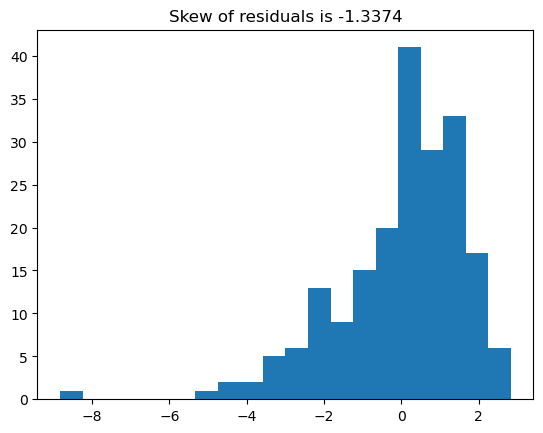

In [100]:
# Normality assumption 
plt.hist (residuals, bins=20)
plt.title (f'Skew of residuals is {pd.Series(residuals).skew():.4f}')
plt.show()

In [102]:
ads['sales'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: sales, dtype: float64

In [104]:
ads['sales'].sort_values(ascending=False)

175    27.0
183    26.2
198    25.5
98     25.4
147    25.4
       ... 
108     5.3
78      5.3
8       4.8
155     3.2
130     1.6
Name: sales, Length: 200, dtype: float64

---

This is how an "ideal" residuals would look like (below - the scatter plot):

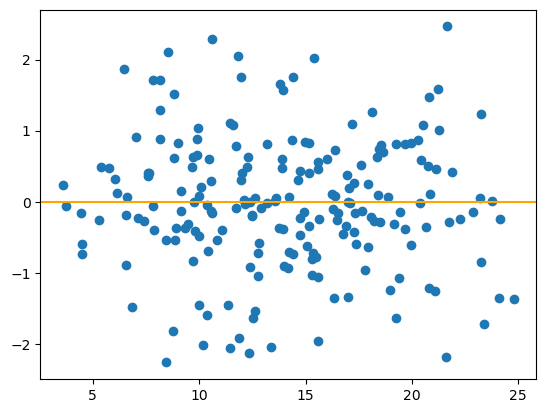

In [109]:
# Use np.random.randn to show what we expect in a residual plot
# create fake residuals


# Create FAKE ERRORs/ RESIDUALS to visually output how we would prefer our real residuals to look like when plotted

errors_fake = np.random.randn(ads.shape[0])
plt.scatter(y_preds,errors_fake)
plt.axhline(0, color = 'orange')
plt.show()

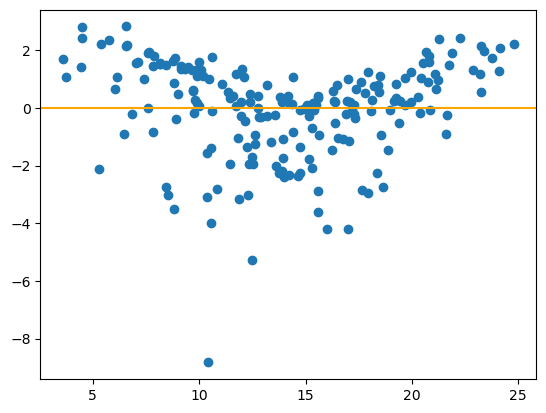

In [111]:
# Let's plot our residuals - check the L and E assumptions
plt.scatter(y_preds,residuals)
plt.axhline(0,color='orange')
plt.show()

## How do we fix (some) violated assumptions?
Let's check out our slide deck.

## Uh oh - My LINE assumptions are violated. Is all hope lost?

It may sound unintuitive, but probably not! There are `two goals of modeling`: `prediction and inference`. If our goal is prediction, our goal is the best error metrics. If we have good error metrics, who can argue with bad assumptions?

That's not to say you should ignore violated assumptions. If you can correct for a violated assumption, you are almost guaranteed to see an improvement in your predictions.

_(If your goal is inference (that is, interpretability), then your assumptions being valid is absolutely crucial.)_

![](./imgs/jp-meme.png)

## Mean Absolute Error (MAE)
---

$$MAE = \frac{1}{n}\sum_{i=1}^n(|y_i-\hat{y}_i|)$$

Goal: Get MAE as close to 0 as possible.

Pros: 
- Represents median distance from the predicted value.
- In the original units of $y$. 
- Is not heavily affected by outliers.

Cons: 
- Depends on scale of $y$. (i.e. housing prices vs. GPA)
- Punishes all errors with same "severity".

In [119]:
# Calcuate MAE by hand
np.abs(residuals).mean()

1.2520112296870685

In [123]:
# Via sklearn.metrics
metrics.mean_absolute_error (y,y_preds)

1.2520112296870685

## Sum Squared Error (SSE)
---

$$SSE = \sum_{i=1}^n(y_i - \hat{y}_i)^2$$

SSE forms the basis for several loss/optimization functions that we'll cover next:

- Mean squared error (MSE)
- Root mean squared error (RMSE)
- R2

**NOTE:** Depending on what corner of the internet you're in, the SSE goes by many different names. The most common other one you'll see is the **residual sum of squares (RSS)**. However, some other sources abbreviate something else RSS. Be careful!

In [127]:
# Calculate RSS by hand
rss = (residuals**2).sum()

# rss = sum of squared errors --> minimize this 
rss

556.8252629021872

## Mean Squared Error (MSE)
---

$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

Goal: Get $MSE$ as close to 0 as possible.

Pros: 
- Very common; part of other calculations.
- Represents average distance squared from the predicted value.
- Punishes outliers severely.
- Coincides directly with the metric used to fit OLS model.

Cons: 
- Can be heavily affected by outliers.
- Not in the original units of $y$.
- Depends on scale of $y$. (i.e. housing prices vs. GPA)
- Uninterpretable to humans

In [130]:
# MSE by hand
mse = rss/ len(residuals)
mse

2.784126314510936

In [134]:
# MSE using sklearn
metrics.mean_squared_error(y, y_preds)

2.784126314510936

## Root Mean Squared Error (RMSE)
---

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Goal: Get $RMSE$ as close to 0 as possible.

Pros: 
- Pretty common.
- Represents (approximately) average distance from the predicted value.
    - Looks similar to standard deviation.
- In the original units of $y$.

Cons: 
- Can be heavily affected by outliers.
- Depends on scale of $y$. (i.e. housing prices vs. GPA)
- Only a _little_ interpretable enough.

In [138]:
# RMSE - using MSE and taking the square root of that
np.sqrt(mse)

1.6685701407225697

In [140]:
# RMSE - without using NumPy
# squared=False gives us the square root
metrics.root_mean_squared_error(y,y_preds)

1.6685701407225697

### Comparison of Loss Functions

In [151]:
# Example true and predicted values

true = [3,7,2,9,1,5,10,6,4,8]

preds = [5,2,9,1,7,3,10,6,8,4]

errors = [-2,5,-7,8,-6,2,0,0,-4,4]

squared = [4,25,49,64,36,4,0,0,16,16]
sum (squared)

214

In [ ]:
sse/len(errors)

In [153]:
# SSE 
sse = sum((t - p)**2 for t,p in zip (true,preds))
print (f'The sum of squared errors is {sse}.')

The sum of squared errors is 214.


In [167]:
# MSE
mse = 214/10 # Sum of squared / n
mse

21.4

In [163]:
print (f'MSE is {metrics.mean_squared_error(true,preds)}')

MSE is 21.4


In [181]:
#RMSE
mse ** 0.5

4.626013402488151

In [ ]:
# np.sqrt(mse)

In [175]:
print (f'RMSE is {metrics.root_mean_squared_error(true,preds):.2f}')

RMSE is 4.63


## Coefficient of Determination, $R^2$
---

$$R^2 = \frac{\text{Explained Variance}}{\text{Total Variance}} = 1 - \frac{\text{Model Error}}{\text{Total Variance}} = 1 - \frac{\sum_{i=1}^n(y_i - \hat{y}_i)^2}{\sum_{i=1}^n(y_i - \bar{y})^2}$$

Goal: Get $R^2$ as close to 1 as possible.

> - score = 0: Model explains none of the variability of the response data around its mean.
> - score = 1: Model explains all the variability of the response data around its mean.

Pros:
- Easy interpretation. "An $R^2$ value of 0.8 means that 80% of the variability in _y_ is explained by the _x_-variables in our model."
- Common metric.
- Does not depend on the scale of $Y$.
- Works with more than just _linear_ regression.

Cons:
- As you add more variables, $R^2$ will never decrease (with linear regression). [Adjusted $R^2$](https://www.statisticshowto.com/adjusted-r2/) can handle this assumption better.
- **ONLY INTERPRETABLE WITH LINEAR REGRESSION!**
- Outside linear regression values outside 0 and 1 are possible.

> Are low $R^2$ scores bad?
>
> I'm glad you asked! Not everything in regression is about getting the best predictions. In some fields, such as human behavior, you would expect to achieve scores much lower then 50\%! For inference, perhaps 0.3 is enough to measure an effect! Yes, there is more to machine learning than prediction. Inference can be the goal as well!

[Documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score)

In [ ]:
# Null prediction


In [ ]:
# Null residuals


In [ ]:
# Null sum of squares


In [ ]:
# R2 by hand


In [ ]:
# R2 from sklearn


In [ ]:
# R2 from model


**Interpretation** - ?